### Forward Euler solution of RC circuit with resting leak conductance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define cell parameters

In [2]:
diameter = 40                 # um   
A = 4*np.pi*(diameter/2)**2   # µm^2 membrane area
cm_bar = 0.01 *1e-12          # F/µm^2, specific capacitance, 0.01 pF/µm^2
gL_bar = 3.0 *1e-12           # S/µm^2, specific leak conductance, 3 pS/µm^2
VL = -65 *1e-3                # V, reversal potential for leak conductance 

Calculate cell specific values

In [3]:
Cm = cm_bar*A    # F
GL = gL_bar*A    # S

print('Area =', round(A), 'um^2')
print('Cm =', round(Cm*1e12,1), 'pF')
print('GL =', round(GL*1e9,1), 'nS')

Area = 5027 um^2
Cm = 50.3 pF
GL = 15.1 nS


Define the stimulation protocol

In [4]:
# Simulation parameters
Tend = 60 *1e-3               # 60 ms, duration of simulation 
dt = 0.1 *1e-3                # 0.1 ms, time step     
t = np.arange(0, Tend+dt, dt) # create time vector
Nt = len(t)-1                 # number of time steps

# Stimulus parameters for current step
t1 = 5 *1e-3       # 5 ms, start of current pulse 
t2 = 30 *1e-3      # 30 ms, end of current pulse 
amp = 200 *1e-12   # 200 pA, amplitude of current pulse

# Create stimulus vector with current injection starting at time t1 and ending at time t2
Nt1 = round(t1/dt)+1
Nt2 = round(t2/dt)
Istim = np.zeros(Nt+1)  
Istim[Nt1:Nt2] = amp  # add current to stimulus vector

Initialize voltage and current vectors

In [5]:
# Create voltage and current vectors
Vm = np.zeros(Nt+1)
Vm[0] = VL             # 65 mV, initial voltage equals leak voltage
IC = np.zeros(Nt+1)    # capacitive current
IG = np.zeros(Nt+1)    # conductance current

Forward Euler solution for membrane voltage

In [6]:
for j in range(0,Nt):
  Vm[j+1] = Vm[j] + dt*(Istim[j+1] - GL*(Vm[j]-VL))/Cm

Calculate current vectors and convert units

In [7]:
IG = GL*(Vm-VL)   # calculate resistive current 
IC = Istim-IG           # calculate capacitive current

# convert units
t = t *1e3          # s to ms
Vm = Vm *1e3        # V to mV
Istim = Istim *1e12 # A to pA
IG = IG *1e12       # A to pA
IC = IC *1e12       # A to pA

Plot results

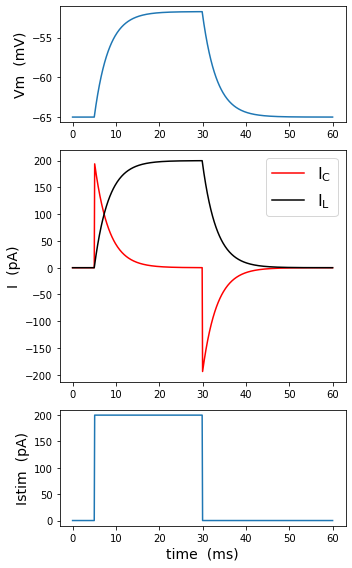

In [8]:
plt.rcParams['figure.figsize'] = [5, 8]
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [2, 4, 2]})

a0.plot(t,Vm)
a0.set_ylabel('Vm  (mV)', fontsize=14)

a1.plot(t,IC,'r', label="$\mathregular{I_C}$")
a1.plot(t,IG,'k', label="$\mathregular{I_{L}}$")
a1.set_ylabel('I  (pA)', fontsize=14)
a1.legend(loc="upper right", fontsize=16)

a2.plot(t,Istim)

a2.set_xlabel('time  (ms)', fontsize=14)
a2.set_ylabel('Istim  (pA)', fontsize=14)

f.tight_layout()